In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Dimensions in data science are the features of the dataset
# They can be described as different columns
# easy to plot 2D - x,y or 3D - x,y,z but harder for more dimensions
# when there are many dimensions, its likely some are correlated - i.e. genre with instruments played
# so...
# many dimensions are hard to work with
# could try to reduce dimensionality of the dataset - i.e. remove some dimensions and keep those which store important information

# Principal Component Analysis (PCA) = a way to reduce dimensionality of a dataset
# it produces a new set of dimensions -> the principal components (PC)
# # they are ordered -> first PC has largest variance, 2nd has bit less etc.
# # PC's are orthogonal - i.e. their dot product = 0
# # # What this means is that each PC is de-correlated to the preceeding one
# # # Can choose to keep only first few
# # # Each PC is a linear combination of the data features

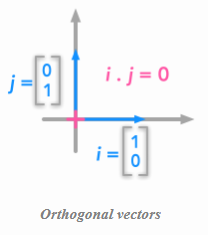

In [3]:
# So... how to define the problem statement for PCA?
# Find a function that converts a set of datapoints from Rn to Rl where n is the original number of dimensions and l the new
# if l < n the new dataset will be compressed
# also need a function to decode back the transformed dataset into the initial one

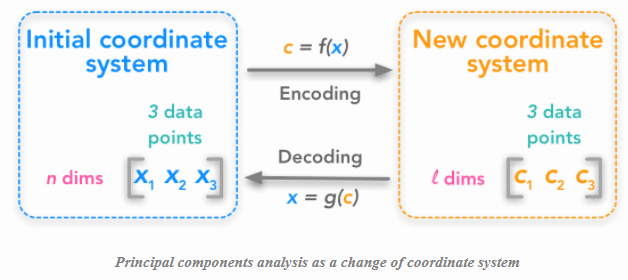

In [4]:
# Need to think of the data as datapoints, each containing n dimensions.
# i.e. we can have m datapoints each being a column vector with 1 column per datapoint
# x = [x1, x2, x3 ... xm]

# exploding the columns would result in a matrix
# x = [x1_1, x2_1, x3_1 ... xm_1]
#     [x1_2, x2_2, x3_2 ... xm_2]
#     [x1_n, x2_n, x3_n ... xm_n]

# performing PCA would transform x into c where c:
# c = [c1, c2 ... cl]

In [5]:
# Constraints for coding functions:

# Encoding function: f(x) turns x into c
# Decoding function: g(c) turns c into x': where x' is an approximation of x

# Constraint 1: Decoding f. must be a simple matmul where g(c) = Dc
# Constraint 2: Columns of matrix D must be orthogonal
# Constraint 3: Columns of matrix D must have unit norm

In [6]:
# Finding the decoding function: (encoding function will be found from the decoding function)

# lets consider we have 1 datapoint so the dimensions are as follows

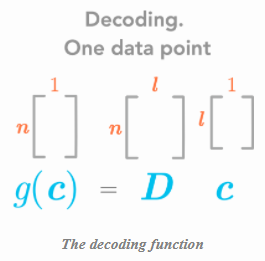

In [7]:
# We want to minimize the error between the decoded data and actual datapoint.
# in essence - reducing distance between x and g(c)
# indicator of distance - squared L2 norm
# ||x - g(c)||2_2 <--- this is what we're trying to minimize

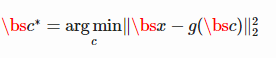

In [8]:
# c* is the optimal c
# meaning? --> means we want to find values of vector c such that sqL2 norm of x-g(c) is as small as possible
# squared L2 norm can be expressed as ||y||2_2 = yTy
# here, y = x - g(c)

# soooo.... 

# the equation we want to minimize becomes:
# (x - g(c))T(x - g(c))

# transpose respects addition
# (xT - g(c)T)(x - g(c))

# distributively 
# xTx - xTg(c) - g(c)Tx + g(c)Tg(c)

# we know that xTy = yTx
# we also know that result of g(c)Tx is a scalar
# so we have: g(c)Tx = xTg(c)

# equation becomes:
# xTx - xTg(c) - xTg(c) + g(c)Tg(c) = 
# xTx - 2(xTg(c)) + g(c)Tg(c)

# xTx is independent from c and since we're minimizing g(c) (according to c) --> we can remove
# as such the minimization function becomes:
# c* = arg min(c): -2xTg(c) + g(c)Tg(c)

# we know g(c) = Dc

# c* = arg min(c): -2(xT)Dc + (Dc)TDc

# we know now that (Dc)T = cTDT

# c* = arg min(c): -2xTDc + cTDTDc

# as mentioned, DTD = Il because D must be orthogonal (semi-orthogonal is n != l) and unit norm columns

# c* arg min(c): -2xTDc + cTIlc
# c* arg min(c): -2xTDc + cTc


In [9]:
# Now we need to find the minimum value of the function

In [10]:
# Can use gradient descent (GD)
# Main idea:
# # sign of derivative of the function at specific value of x tells you if you need to increase or decrease x to reach minimum
# # when slope is ~0 --> minimum reached

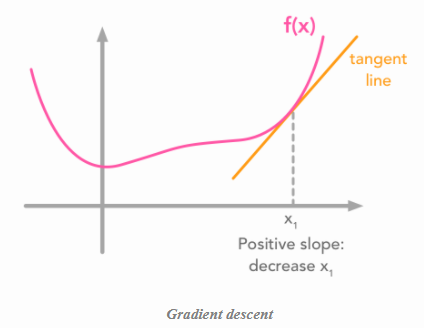

In [11]:
# There are however problems of local minima

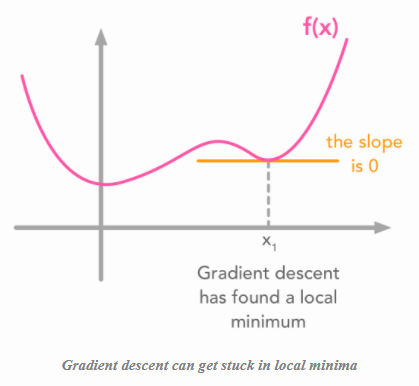

These examples are in 2 dimensions but the principle stands for higher dimensional functions. The gradient is a vector containing the partial derivatives of all dimensions. Its mathematical notation is ∇xf(x).

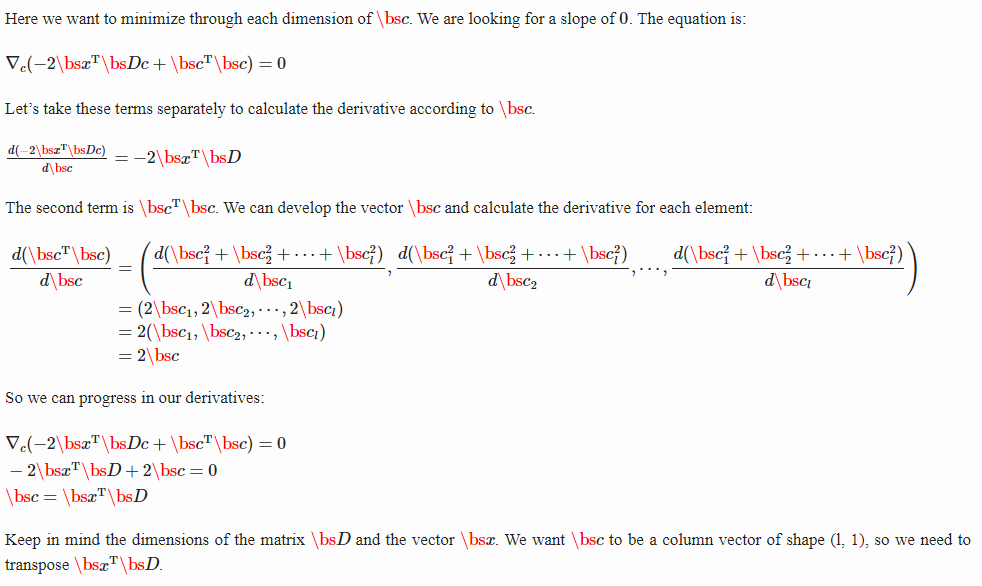

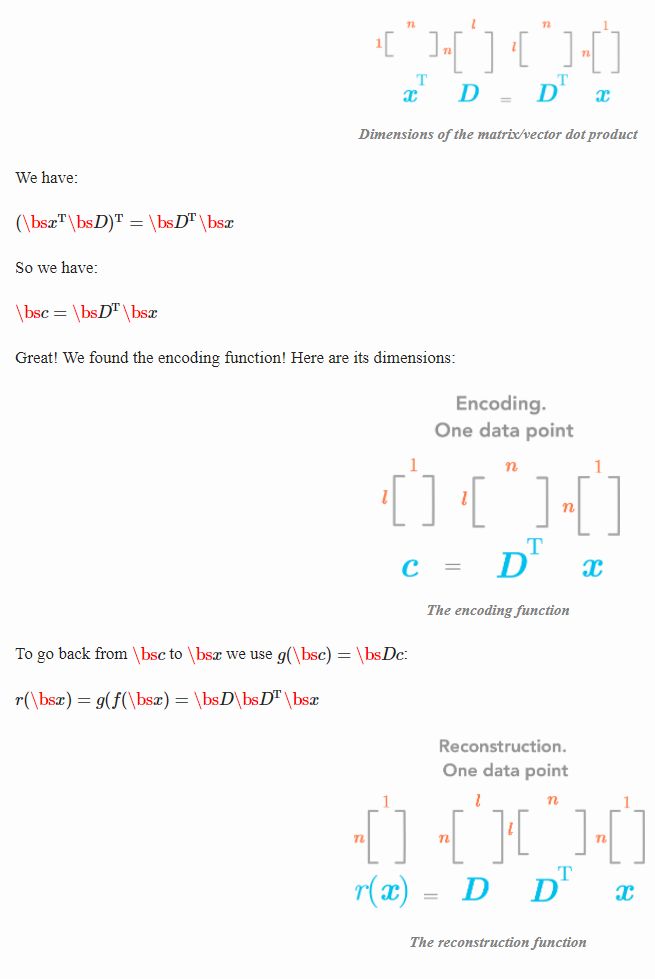

In [12]:
# Next step --> find matrix D

# The purpose of PCA is to change the coordinate system in such a way that maximizes the variance along the first dimensions of the projected space.
# equivalent to minimizing the error between data points and their reconstruction

# We have to take all points into account --> the same matrix D being used for all points
# Can use Frobenius norm of the errors which is equivalent to L2 norm for matrices

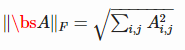

In [13]:
# It is like if you unroll the matrix to end up with a one dimensional vector and that you take the L2 norm of this vector.

In [14]:
# We will call D∗ the optimal D (in the sense that the error is as small as possible). We have:

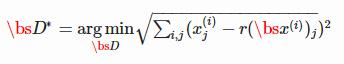

In [ ]:
# With the constraint that DTD=Il because we have chosen the constraint of having the columns of D orthogonal.

In [ ]:
# We want to find the first principal component (PC) --> i.e. l = 1 so matrix D will have shape of (n x 1) i.e. a simple column vector
# since it is a vector, change name from D to d

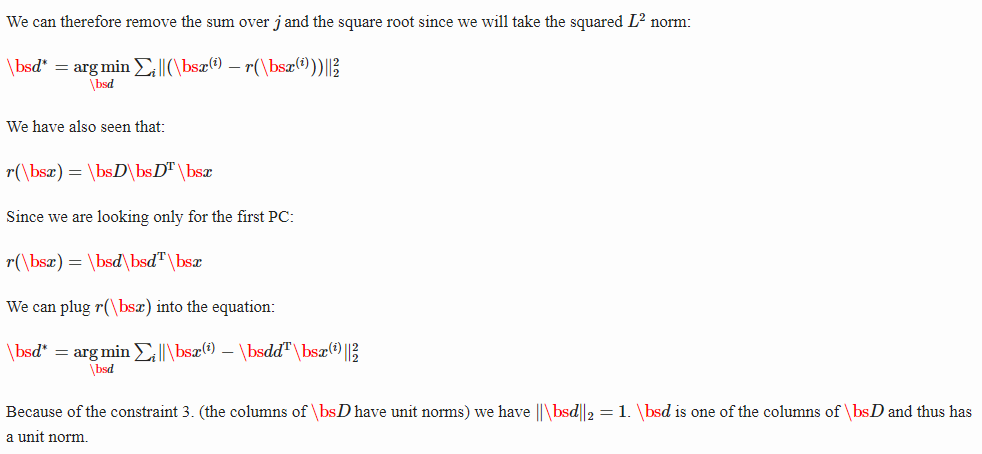

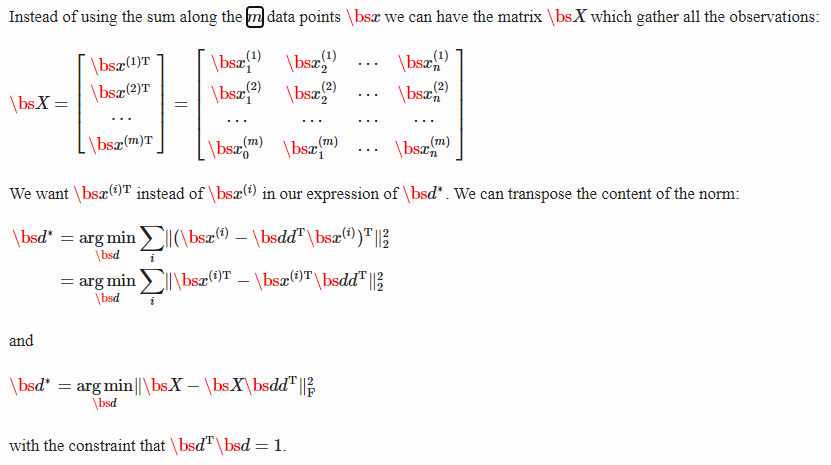

In [ ]:
# unfinished as i don't need it